#### Importing libraries and the data

In [1]:
#Importing labraries 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
#For a better display
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
#Importing the data
df = pd.read_csv('/Users/erbolaliev/Downloads/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


#### Cleaning the data

In [4]:
#Fixing the index column
df.index = np.arange(1, len(df) + 1)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
2,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
3,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
4,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
5,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
#Checking for the missing data
for i in df.columns:
    pct_missing = np.mean(df[i].isnull()).round(2) # 'isna' does the same thing as 'isnull'
    #print(i,'column has ', pct_missing, 'missing')
    print('{}-{}% missing values'.format(i, pct_missing))
    #we can see budget and gross has the most missing values

name-0.0% missing values
rating-0.01% missing values
genre-0.0% missing values
year-0.0% missing values
released-0.0% missing values
score-0.0% missing values
votes-0.0% missing values
director-0.0% missing values
writer-0.0% missing values
star-0.0% missing values
country-0.0% missing values
budget-0.28% missing values
gross-0.02% missing values
company-0.0% missing values
runtime-0.0% missing values


In [6]:
len(df['budget'])

7668

In [7]:
#df = df.dropna(axis = 0) this drops the missing data by row(axis=0), but we won't do it because it deltes 2k rows

In [8]:
#fixing the data type of some columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
#Long version how to change dtypes of multiple columns
#df['budget'] = df['budget'].astype('int64')
#df['votes'] = df['votes'].astype('int64')
#df['gross'] = df['gross'].astype('int64')

In [10]:
df = df.fillna(0)
#Short version how to change dtypes of multiple columns
df[['budget', 'votes', 'gross']] = df[['budget', 'votes', 'gross']].apply(lambda x: x.astype('int64'))

In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
2,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
3,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
4,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
5,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [12]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [13]:
#Creating correct year column, because year is not year released 
df['year_corrected'] = df["released"].str.split(" ").str[2]

In [14]:
pd.set_option('display.max_rows', None)

#### Data Analysis: Visualization/Correlation

In [15]:
# Does larger budget create larger revenue/gross?
# Do bigger film production brands make more money? 

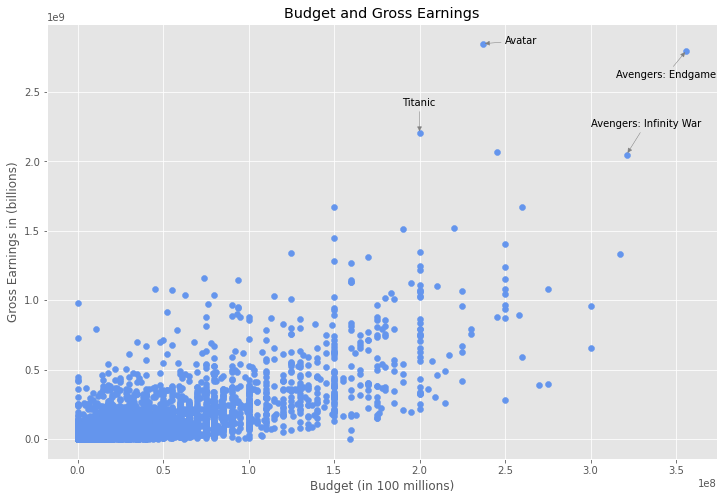

In [16]:
fig, ax = plt.subplots()
ax.scatter(x = df['budget'], y = df.gross, color = 'cornflowerblue') #df['budget'] = df.budget
ax.set_title('Budget and Gross Earnings')
ax.set_xlabel('Budget (in 100 millions)')
ax.set_ylabel('Gross Earnings in (billions)')
ax.annotate('Avatar', xy = (237000000, 2847246203),
             xytext = (250000000, 2847246203),
             arrowprops = {'arrowstyle':'-|>', 'color':'grey'})
ax.annotate('Avengers: Endgame', xy = (356000000, 2797501328),
             xytext = (315000000, 2600000000),
             arrowprops = {'arrowstyle':'-|>', 'color':'grey'})
ax.annotate('Titanic', xy = (200000000, 2201647264),
             xytext = (190000000, 2401647264),
             arrowprops = {'arrowstyle':'-|>', 'color':'grey'})
ax.annotate('Avengers: Infinity War', xy = (321000000, 2048359754),
             xytext = (300000000, 2248359754),
             arrowprops = {'arrowstyle':'-|>', 'color':'grey'})

plt.show()

In [17]:
#Ordering by a gross revenue (top 5)
df.sort_values(by = ['gross'], inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
5446,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7446,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3046,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6664,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7245,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [18]:
#Ordering by budget (top5)
df.sort_values(by = ['budget'], inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
7446,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
7245,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7076,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0,2017
5061,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0,2007
7067,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0,2017


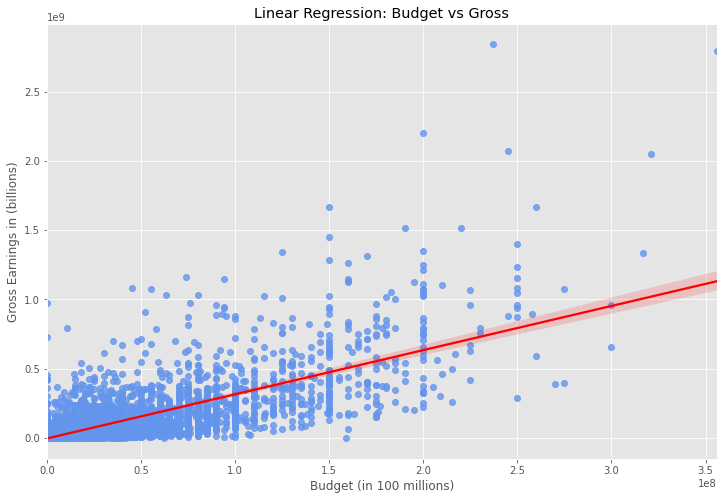

In [19]:
#Linear Regression using seaborn 
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws= {'color':'cornflowerblue'}, line_kws = {'color':'red'})
plt.title("Linear Regression: Budget vs Gross")
plt.xlabel('Budget (in 100 millions)')
plt.ylabel('Gross Earnings in (billions)')
plt.show()

In [20]:
#Correlation (Pearson, Kendall, Spearman)
df.corr() #by default is Pearson

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


In [21]:
df.corr(method = 'spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097757,0.468107,0.291152,0.314681,0.141805
score,0.097757,1.000000,0.428810,-0.007002,0.133564,0.399868
votes,0.468107,0.428810,1.000000,0.604693,0.752550,0.289359
budget,0.291152,-0.007002,0.604693,1.000000,0.716816,0.246941
gross,0.314681,0.133564,0.752550,0.716816,1.000000,0.257478
runtime,0.141805,0.399868,0.289359,0.246941,0.257478,1.000000


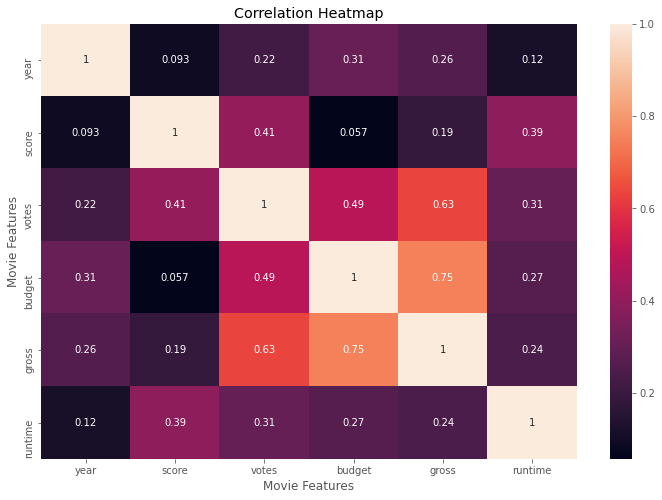

In [22]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Heatmap')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [23]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
1,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
2,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
3,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
4,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
5,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
6,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
7,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
8,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
9,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
10,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


In [24]:
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
1,6587,7,6,1980,1706,8.4,927000,2589,4015,1048,55,19000000,46998772,2320,146.0,2
2,5573,7,1,1980,1493,5.8,65000,2269,1633,328,56,4500000,58853106,732,104.0,2
3,5142,5,0,1980,1772,8.7,1200000,1111,2568,1746,56,18000000,538375067,1541,124.0,2
4,286,5,4,1980,1493,7.7,221000,1301,2001,2247,56,3500000,83453539,1813,88.0,2
5,1027,7,4,1980,1544,7.3,108000,1054,522,411,56,6000000,39846344,1778,98.0,2
6,2109,7,10,1980,2503,6.4,123000,2528,4363,242,56,550000,39754601,1813,95.0,2
7,5574,7,0,1980,1772,7.9,188000,1412,839,1278,56,27000000,115229890,2282,133.0,2
8,4436,7,3,1980,700,8.2,330000,1829,1770,2241,56,18000000,23402427,632,129.0,2
9,5281,5,0,1980,1754,6.8,101000,2306,1980,878,56,54000000,108185706,884,127.0,3
10,6213,7,3,1980,2287,7.0,10000,2864,424,590,56,10000000,15795189,2273,100.0,2


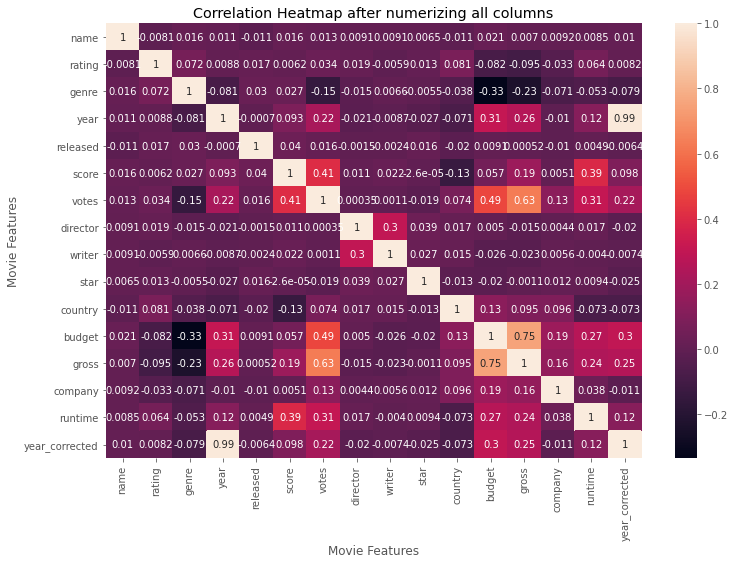

In [25]:
corr_matrix2 = df_numerized.corr()

sns.heatmap(corr_matrix2, annot = True)
plt.title('Correlation Heatmap after numerizing all columns')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [26]:
#Another way to see correlation coefficient 
corr_pairs = corr_matrix2.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
dtype: float64

In [27]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

genre   budget   -0.334021
budget  genre    -0.334021
genre   gross    -0.234297
gross   genre    -0.234297
votes   genre    -0.145296
dtype: float64

In [28]:
high_corr_pairs = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 0.95)]
high_corr_pairs

gross   votes     0.632870
votes   gross     0.632870
gross   budget    0.750157
budget  gross     0.750157
dtype: float64

In [29]:
# Most correlated: Votes and Budget has the highest correlation to  gross earnings
# Company name has low correlation to gross earnings